IMPORTING LIBRARIES

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


Reading the File

In [42]:
df = pd.read_csv("/content/Pakistan_Automobile_Market_Synthetic.csv")


BASIC INFO


In [54]:
Head = df.head()
print(Head)

print('\n')

Info = df.info()
print(Info)

print('\n')

Describe = df.describe()
print(Describe)

     Make    Model  Year  Price (PKR)  Mileage (KM) Fuel Type Transmission  \
0  Suzuki  Wagon R  2007       400000         27790    Petrol    Automatic   
1  Suzuki   Cultus  2016      1020012        175363    Diesel       Manual   
2  Toyota     Aqua  2000       400000         94194    Petrol    Automatic   
3  Suzuki    Swift  2003       400000         74342    Diesel       Manual   
4  Suzuki    Swift  2002       400000        156349    Petrol    Automatic   

         City Condition              Year_bin               Price_bin  
0     Karachi      Used  (2006.545, 2007.273]  (399999.999, 779907.0]  
1  Rawalpindi      Used    (2015.273, 2016.0]   (779907.0, 1615551.0]  
2    Peshawar      Used  (1999.976, 2000.727]  (399999.999, 779907.0]  
3     Sialkot      Used  (2002.909, 2003.636]  (399999.999, 779907.0]  
4     Karachi      Used  (2001.455, 2002.182]  (399999.999, 779907.0]  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 11 

Frequency Distribution (Counts & Proportions)

In [43]:
# a) Counts & proportions for 'Make'
Make_Count= df['Make'].value_counts()
Make_Proportions = df['Make'].value_counts(normalize=True)
print("Make Counts:\n", Make_Count)
print()
print("\nMake Proportions:\n", Make_Proportions)

print()

# b) Bin 'Year' into k bins using Rice Rule (k = 2 * n^(1/3))
n = len(df)
k = int(2 * n ** (1/3))
df['Year_bin'] = pd.cut(df['Year'], bins=k)
Frequency_Per_Year = df['Year_bin'].value_counts().sort_index()
print("\nYear Frequency (binned):\n", Frequency_Per_Year)


Make Counts:
 Make
Suzuki      1231
Toyota      1041
Honda        788
Kia          413
Hyundai      374
Changan      211
Nissan       209
Daihatsu     199
BMW           78
Audi          75
Name: count, dtype: int64


Make Proportions:
 Make
Suzuki      0.266508
Toyota      0.225373
Honda       0.170600
Kia         0.089413
Hyundai     0.080970
Changan     0.045681
Nissan      0.045248
Daihatsu    0.043083
BMW         0.016887
Audi        0.016237
Name: proportion, dtype: float64


Year Frequency (binned):
 Year_bin
(1999.976, 2000.727]    190
(2000.727, 2001.455]    201
(2001.455, 2002.182]    192
(2002.182, 2002.909]      0
(2002.909, 2003.636]    187
(2003.636, 2004.364]    192
(2004.364, 2005.091]    190
(2005.091, 2005.818]      0
(2005.818, 2006.545]    185
(2006.545, 2007.273]    206
(2007.273, 2008.0]      176
(2008.0, 2008.727]        0
(2008.727, 2009.455]    195
(2009.455, 2010.182]    174
(2010.182, 2010.909]      0
(2010.909, 2011.636]    170
(2011.636, 2012.364]    179
(20

Mean & Variance via Frequency Weights for 'Price (PKR)'

In [44]:
Price_Frequency = DataFrame['Price (PKR)'].value_counts().sort_index()
x = Price_Frequency.index.values    # unique prices
f = Price_Frequency.values          # frequencies

# Weighted mean
Mean_Weigthed = (f * x).sum() / f.sum()

# Weighted variance
Price_Variance = (f * (x - Mean_Weigthed)**2).sum() / f.sum()

print(f"Weighted Mean Price: {Mean_Weigthed:.2f} PKR")
print(f"Weighted Variance Price: {Price_Variance:.2f}")


Weighted Mean Price: 1870295.08 PKR
Weighted Variance Price: 2403729839205.85


95% Confidence Interval for Mean & Variance of 'Mileage (KM)

In [45]:
Mileages = df['Mileage (KM)']
n_Mileages = len(Mileages)
Mean_Mileages = Mileages.mean()
Variance_Mileages = Mileages.var(ddof=1)

Alpha = 0.05
T_Critical = stats.t.ppf(1 - Alpha/2, df=n_Mileages-1)
SE_Mileages = np.sqrt(Variance_Mileages / n_Mileages)
CI_Mean_Mileages = (Mean_Mileages - T_Critical * SE_Mileages, Mean_Mileages + T_Critical * SE_Mileages)

ChiSquared_LB= stats.chi2.ppf(Alpha/2, df=n_Mileages-1)
ChiSquared_UB = stats.chi2.ppf(1 - Alpha/2, df=n_Mileages-1)
CI_Variance_Mileages = ((n_Mileages-1)*Variance_Mileages/ChiSquared_UB, (n_Mileages-1)*Variance_Mileages/ChiSquared_LB)

print(f"95% CI for Mean Mileage: {CI_Mean_Mileages}")
print(f"95% CI for Variance of Mileage: {CI_Variance_Mileages}")


95% CI for Mean Mileage: (np.float64(83398.17092329539), np.float64(86569.76196261066))
95% CI for Variance of Mileage: (np.float64(2902589147.202252), np.float64(3149326193.6741834))


Approximate 95%/95% Tolerance Interval for 'Price (PKR)

In [46]:
p = 0.95      # proportion coverage
Gamma = 0.95  # confidence
Prices = df['Price (PKR)']
n_Prices = len(Prices)
Mean_Prices = Prices.mean()
SD_Prices = Prices.std(ddof=1)

# Approximate tolerance factor using t-distribution
t_critical = stats.t.ppf(1 - (1 - Gamma) / 2, df=n_Prices - 1)
k = t_critical * np.sqrt(1 + 1 / n_Prices)

Tolerance_Interval_P = (Mean_Prices - k * SD_Prices, Mean_Prices + k * SD_Prices)

print(f"\nApproximate 95%/95% Tolerance Interval for Price: ({Tolerance_Interval_P[0]:.2f}, {Tolerance_Interval_P[1]:.2f})")


Approximate 95%/95% Tolerance Interval for Price: (-1169881.32, 4910471.48)


Chi-Squared Test for Independence

In [47]:

df['Price_bin'] = pd.qcut(df['Price (PKR)'], q=4, duplicates='drop')
Contingency = pd.crosstab(df['Make'], df['Price_bin'])

chi2, p_val, dof, expected = chi2_contingency(Contingency)
print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p_val:.4f}")


Chi2 statistic: 2624.85
p-value: 0.0000


VISUALIZATIONS

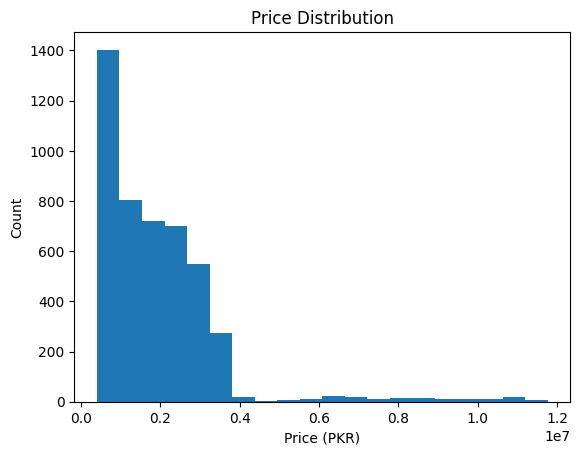

In [48]:
# a) Histogram of 'Price (PKR)'
plt.hist(df['Price (PKR)'], bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (PKR)")
plt.ylabel("Count")
plt.show()

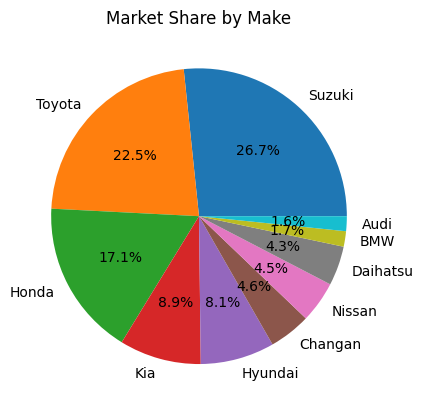

In [49]:
# b) Pie chart for 'Make' proportions
df['Make'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title("Market Share by Make")
plt.show()

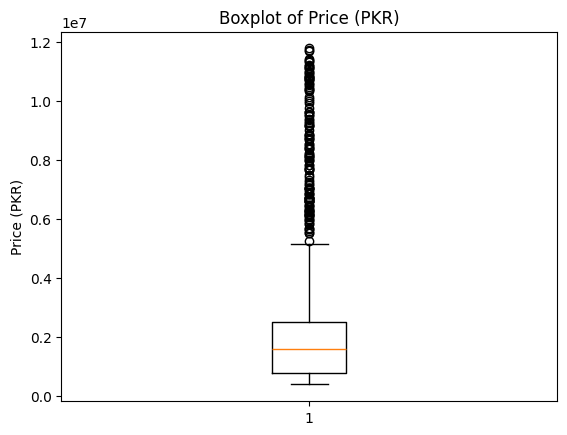

In [50]:
# c) Boxplot of Price (PKR)

plt.figure()
plt.boxplot(df['Price (PKR)'])
plt.title('Boxplot of Price (PKR)')
plt.ylabel('Price (PKR)')
plt.show()

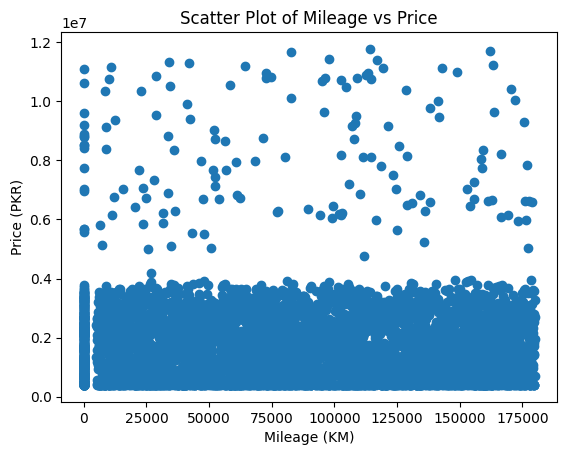

In [51]:
# d) Scatter Plot: Mileage vs Price

plt.figure()
plt.scatter(df['Mileage (KM)'], df['Price (PKR)'])
plt.title('Scatter Plot of Mileage vs Price')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (PKR)')
plt.show()


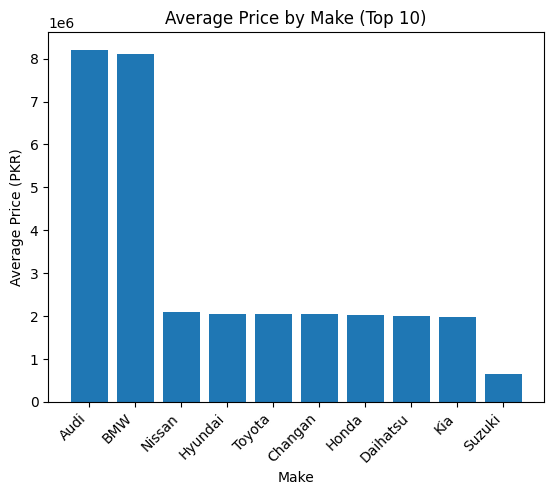

In [52]:
# e) Bar Chart: Average Price by Make (Top 10)

# Compute average price by Make
avg_price_by_make = df.groupby('Make')['Price (PKR)'] \
                      .mean() \
                      .sort_values(ascending=False) \
                      .head(10)

# Create bar chart
plt.figure()
plt.bar(avg_price_by_make.index, avg_price_by_make)
plt.title('Average Price by Make (Top 10)')
plt.xlabel('Make')
plt.ylabel('Average Price (PKR)')
plt.xticks(rotation=45, ha='right')
plt.show()
